In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.feature_extraction.text as text
from sklearn.decomposition import PCA
import sklearn.cluster as clu
from sklearn.linear_model import SGDRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_lfw_people
from sklearn.manifold import Isomap
import sklearn.preprocessing
import statsmodels.api as sm
import scipy as sc
from sklearn.metrics import r2_score
import re
import numpy as np
import gensim
import gensim.downloader as model_api
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree
from matplotlib import offsetbox
import umap
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# 1. App Review NLP work

This question uses the Apple App review dataset that you generated in the "Pulling online data" workshop. Your dataset should have at least 3-5 different applications, with data from a few countries.

**1.1** Using the bag-of-words or TF-IDF vector model (from SKLearn), cluster the reviews into 5 clusters. Measure the accuracy of the cluster overlap against the real review scores.

In [2]:
code_dict = {
    "ae": "United Arab Emirates",
    "ag": "Antigua and Barbuda",
    "ai": "Anguilla",
    "al": "Albania",
    "am": "Armenia",
    "ao": "Angola",
    "ar": "Argentina",
    "at": "Austria",
    "au": "Australia",
    "az": "Azerbaijan",
    "bb": "Barbados",
    "be": "Belgium",
    "bf": "Burkina-Faso",
    "bg": "Bulgaria",
    "bh": "Bahrain",
    "bj": "Benin",
    "bm": "Bermuda",
    "bn": "Brunei Darussalam",
    "bo": "Bolivia",
    "br": "Brazil",
    "bs": "Bahamas",
    "bt": "Bhutan",
    "bw": "Botswana",
    "by": "Belarus",
    "bz": "Belize",
    "ca": "Canada",
    "cg": "Democratic Republic of the Congo",
    "ch": "Switzerland",
    "cl": "Chile",
    "cn": "China",
    "co": "Colombia",
    "cr": "Costa Rica",
    "cv": "Cape Verde",
    "cy": "Cyprus",
    "cz": "Czech Republic",
    "de": "Germany",
    "dk": "Denmark",
    "dm": "Dominica",
    "do": "Dominican Republic",
    "dz": "Algeria",
    "ec": "Ecuador",
    "ee": "Estonia",
    "eg": "Egypt",
    "es": "Spain",
    "fi": "Finland",
    "fj": "Fiji",
    "fm": "Federated States of Micronesia",
    "fr": "France",
    "gb": "Great Britain",
    "gd": "Grenada",
    "gh": "Ghana",
    "gm": "Gambia",
    "gr": "Greece",
    "gt": "Guatemala",
    "gw": "Guinea Bissau",
    "gy": "Guyana",
    "hk": "Hong Kong",
    "hn": "Honduras",
    "hr": "Croatia",
    "hu": "Hungaria",
    "id": "Indonesia",
    "ie": "Ireland",
    "il": "Israel",
    "in": "India",
    "is": "Iceland",
    "it": "Italy",
    "jm": "Jamaica",
    "jo": "Jordan",
    "jp": "Japan",
    "ke": "Kenya",
    "kg": "Krygyzstan",
    "kh": "Cambodia",
    "kn": "Saint Kitts and Nevis",
    "kr": "South Korea",
    "kw": "Kuwait",
    "ky": "Cayman Islands",
    "kz": "Kazakhstan",
    "la": "Laos",
    "lb": "Lebanon",
    "lc": "Saint Lucia",
    "lk": "Sri Lanka",
    "lr": "Liberia",
    "lt": "Lithuania",
    "lu": "Luxembourg",
    "lv": "Latvia",
    "md": "Moldova",
    "mg": "Madagascar",
    "mk": "Macedonia",
    "ml": "Mali",
    "mn": "Mongolia",
    "mo": "Macau",
    "mr": "Mauritania",
    "ms": "Montserrat",
    "mt": "Malta",
    "mu": "Mauritius",
    "mw": "Malawi",
    "mx": "Mexico",
    "my": "Malaysia",
    "mz": "Mozambique",
    "na": "Namibia",
    "ne": "Niger",
    "ng": "Nigeria",
    "ni": "Nicaragua",
    "nl": "Netherlands",
    "np": "Nepal",
    "no": "Norway",
    "nz": "New Zealand",
    "om": "Oman",
    "pa": "Panama",
    "pe": "Peru",
    "pg": "Papua New Guinea",
    "ph": "Philippines",
    "pk": "Pakistan",
    "pl": "Poland",
    "pt": "Portugal",
    "pw": "Palau",
    "py": "Paraguay",
    "qa": "Qatar",
    "ro": "Romania",
    "ru": "Russia",
    "sa": "Saudi Arabia",
    "sb": "Soloman Islands",
    "sc": "Seychelles",
    "se": "Sweden",
    "sg": "Singapore",
    "si": "Slovenia",
    "sk": "Slovakia",
    "sl": "Sierra Leone",
    "sn": "Senegal",
    "sr": "Suriname",
    "st": "Sao Tome e Principe",
    "sv": "El Salvador",
    "sz": "Swaziland",
    "tc": "Turks and Caicos Islands",
    "td": "Chad",
    "th": "Thailand",
    "tj": "Tajikistan",
    "tm": "Turkmenistan",
    "tn": "Tunisia",
    "tr": "Turkey",
    "tt": "Republic of Trinidad and Tobago",
    "tw": "Taiwan",
    "tz": "Tanzania",
    "ua": "Ukraine",
    "ug": "Uganda",
    "us": "United States of America",
    "uy": "Uruguay",
    "uz": "Uzbekistan",
    "vc": "Saint Vincent and the Grenadines",
    "ve": "Venezuela",
    "vg": "British Virgin Islands",
    "vn": "Vietnam",
    "ye": "Yemen",
    "za": "South Africa",
    "zw": "Zimbabwe"
}

eng_countries = [ 
'Antigua and Barbuda',
'Australia',
'Bahamas',
'Barbados',
'Belize',
'Canada',
'Dominica',
'Grenada',
'Guyana',
'Ireland',
'Jamaica',
'Malta',
'New Zealand',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Republic of Trinidad and Tobago',
'Great Britain',
'United States of America'
]

code_dict_2 = {}
for e in list(code_dict):
    code_dict_2[code_dict[e]] = e

In [3]:
# builds df from apple store api for all apps in APPS

APPS = ['Candy_Crush','Facebook','Tinder','Twitter']

ID_dict = {
    'Candy_Crush' : '553834731',
    'Facebook' : '284882215',
    'Tinder' : '547702041',
    'Twitter' : '333903271' }

app_list = []
#reviews per page
per_page = 50

for app in APPS:
    # get app id
    APP_ID = ID_dict[app]

    for c in eng_countries:
        # get country codes for each eng-speaking country
        COUNTRY = code_dict_2[c]
        
        page = 1
        # loop thru pages 1-5
        while page < 6:
            try:
                r = requests.get(f"https://itunes.apple.com/{COUNTRY}/rss/customerreviews/id={APP_ID}/page={page}/sortby=mostrecent/json")
                js = json.loads(r.content)

                if 'error' not in js:
                    for i in range(per_page):
                        # construct and append entry to app_list
                        app_list.append({
                            'app': f'{app}',
                            'version': js['feed']['entry'][i]['im:version'], 
                            'rating': js['feed']['entry'][i]['im:rating'], 
                            'country': f'{COUNTRY}',
                            'title': js['feed']['entry'][i]['title'], 
                            'content': js['feed']['entry'][i]['content']
            })
                page += 1
            # escape loop if pages not found
            except:
                page = 6
                
dataframe = pd.DataFrame(app_list)

# cleaning
df = dataframe.copy()
cols = ['version', 'rating', 'title','content']
for c in cols:
    df[c] = df[c].str.get('label')
df['rating'] = df['rating'].astype(int)

In [4]:
# cleaning
df = dataframe.copy()
cols = ['version', 'rating', 'title','content']
for c in cols:
    df[c] = df[c].str.get('label')
df['rating'] = df['rating'].astype(int)
df

,app,version,rating,country,title,content
0,Candy_Crush,1.178.0.3,3,ag,Not happy,Why i dont have some feature lile all my frien...
1,Candy_Crush,1.140.0,5,ag,10/10,Sometimes bittersweet but always await.
2,Candy_Crush,1.129.0,3,ag,Fishy,On more than one occasion I got a free spin to...
3,Candy_Crush,1.121.0,5,ag,Awesome,Fun game
4,Candy_Crush,1.49.0,5,ag,Cold,Definitely a one of a kind saga.i can't stop p...
...,...,...,...,...,...,...
8406,Twitter,8.55.1,5,us,添加一个app应用锁,建议添加一个app应用锁，保险起见，不希望别人看到，每次还得登陆登出
8407,Twitter,8.55.1,3,us,Interesting but Too Restrictive,I know how to research and determine facts. Yo...
8408,Twitter,8.55.1,1,us,To one-sided.,Very biased. In silence is people speech. Wish...
8409,Twitter,8.55.1,1,us,DM Bug,There has been an ongoing glitch with DMs wher...


In [5]:
# from sklearn.feature_extraction.text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['content'])
wordLabels = vectorizer.get_feature_names()

# bag-of-words matrix
bow = pd.DataFrame(data=X.toarray(), columns=wordLabels)

tf = text.TfidfVectorizer()
tfidf = tf.fit_transform(df["content"])
tfidf = pd.DataFrame(tfidf.todense())

In [6]:
N_CLUSTERS=5 # one for each rating
COMPRESSED_SIZE = 100
# transpose to compress/PCA on columns
bowc = PCA(COMPRESSED_SIZE,random_state=42).fit(bow.T)
bowc = pd.DataFrame(bowc.components_.T)

In [7]:
# transpose to compress/PCA on columns
tfc = PCA(COMPRESSED_SIZE,random_state=42).fit(tfidf.T)
tfc = pd.DataFrame(tfc.components_.T)

In [8]:
km = clu.KMeans(n_clusters=N_CLUSTERS)
# bow compressed clusters
clusters1 = km.fit_predict(bowc)
# tfidf compressed clusters
clusters2 = km.fit_predict(tfc)

In [9]:
np.unique(clusters1), np.unique(clusters2)

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [10]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(clusters1,df['rating']), fowlkes_mallows_score(clusters2,df['rating'])

(0.43501195759148176, 0.5055718790784569)

In [11]:
# making a version of tfc that is row-wise normalized

tfc_norm = tfc.div(tfc.sum(axis=1), axis=0)
# somehow this process makes some nans, 61 rows have nans
# keep track of what rows now have nans before being dropped 
# so we can drop the same rows before comparison with df.rating
rows_with_nan = [index for index, row in tfc_norm.iterrows() if row.isnull().any()]
rn = np.array(rows_with_nan)
tfc_norm = tfc_norm.dropna()
# df2 will be used to score the glom clustering
df2 = df.drop(rn)


In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.sparse import csr_matrix

N_CLUSTERS=5
glom = AgglomerativeClustering(affinity='cosine', n_clusters=N_CLUSTERS, linkage='average')
clusters = glom.fit_predict(tfc_norm)

In [13]:
# see above re: df2
fowlkes_mallows_score(clusters,df2.rating)

0.3913826188560633

**1.2** Now use a sentence embedding using on of the `gensim` pre-trained word embedding models to achieve the same clustering. Get the best classification accuracy score you can on the 5-star review scale target using all unsupervised methods you want.

In [14]:
# string cleaning, could apply stemming or lemmatization here

# from lecture:
replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))

def replacer(text):
    return rep[re.escape(text.group(0))]

words = df.content.str.replace(pattern, replacer).str.lower().str.split()
# words = pd.DataFrame(words.tolist())

In [15]:
from nltk.stem import WordNetLemmatizer 
# import nltk
# nltk.download('wordnet')

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

for s in words:
    for w in s:
#         if lemmatize_text(w) != w:
#             print(w + ' -> ' + lemmatize_text(w))
        w = lemmatize_text(w)
words = pd.DataFrame(words.tolist())

In [17]:
# gensim
word_vectors = model_api.load("glove-wiki-gigaword-50")

In [18]:
# function from lecture

def soft_get(w):
    try:
        return word_vectors[w]
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def map_vectors(row):
    try:
        res = row.loc[row.notna()].apply(soft_get)
        if len(res) > 0:
            return np.sum(
                res
            )
        else:
            return np.zeros(word_vectors.vector_size)
    except:
        return np.zeros(word_vectors.vector_size)
    
emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())
emb

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5.422930,2.720782,-0.493402,-4.583610,5.950759,1.107445,-7.430810,1.501560,-5.025694,1.051919,...,-3.171463,0.395775,1.764881,8.652328,1.867174,1.997289,-5.626741,0.349690,-5.221900,1.095230
1,1.953864,0.289937,-2.877977,-1.483010,3.259000,-0.110410,-0.575224,2.505920,-2.312210,1.801870,...,-1.364910,-0.139983,-0.139031,1.613560,0.869883,1.287417,0.720287,0.662850,-0.861030,0.206249
2,11.044675,2.492604,7.228591,-10.498785,17.987218,2.301391,-18.943020,1.405076,-13.640373,3.962656,...,-4.945081,4.308476,3.295632,9.516004,-2.517900,5.867036,-4.359484,-4.555082,-6.640469,6.552845
3,-1.147260,0.263260,-1.003980,1.045470,0.621080,-0.499496,-1.723600,-0.605556,-1.081450,1.674180,...,0.183091,-0.234340,-1.504790,1.231050,-0.133590,0.855390,1.210960,-0.075260,0.360188,1.265650
4,2.602581,3.753023,-3.877710,1.291747,4.024881,2.354639,-3.513671,0.132506,-2.381965,3.986016,...,-0.016054,2.853246,-3.562335,2.642519,-0.311204,1.247652,-0.120638,-2.693275,0.376117,1.752980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8407,4.652996,1.488298,1.790273,-5.359683,8.015241,0.084304,-4.840832,-0.703049,1.304229,1.688449,...,-0.222125,-1.479579,1.217802,9.025101,1.713703,0.423883,3.730963,2.780165,1.961334,5.274854
8408,1.357630,1.556410,-6.630070,-3.233747,8.309366,3.625792,-1.423597,-3.526152,-2.101872,-1.445129,...,-3.677504,-1.031963,-0.579990,4.458582,-6.382222,6.790572,-7.041258,1.143507,-2.069459,-1.959160
8409,11.344823,-4.396487,2.681128,-6.468301,3.345916,-1.334731,-13.204730,-2.939307,-5.542450,0.099457,...,-1.117615,1.006650,-3.205440,7.004638,-3.526412,5.746713,5.220830,-3.033161,-0.110858,-3.807194


In [19]:
X = emb
# normalize X matrix
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (X_std.max(axis=0) - X_std.min(axis=0)) + X_std.min(axis=0)

scaler = StandardScaler()
X_sd = scaler.fit_transform(X)

In [20]:
# kmeans on emb (non-normalized)
init = km.fit_predict(emb)
# kmeans on emb standard scaled
scl = km.fit_predict(X_sd)
fowlkes_mallows_score(init,df['rating']), fowlkes_mallows_score(scl,df['rating'])

(0.3936162451419158, 0.42657295012880164)

**1.3** Using any method you want (pre-trained models, dimensionality reduction, feature engineering, etc.) make the best **regression** model you can to predict the 5 star rating. Rate the accuracy in regression terms (mean squared error) and in classification terms (accuracy score, etc.)

In [21]:
# testing various normalizations of embedding data

In [22]:
# unscaled
sgdr = SGDRegressor(max_iter = 10000)
sgdr.fit(emb, df.rating)
sgdr.score(emb, df.rating)

-3.094292544290671e+23

In [23]:
# manual min/max scaling
sgdr = SGDRegressor(max_iter = 10000)
sgdr.fit(X_scaled, df.rating)
sgdr.score(X_scaled, df.rating)

0.16608849069891152

In [24]:
# standard scaler
sgdr = SGDRegressor(max_iter = 10000)
sgdr.fit(X_sd, df.rating)
sgdr.score(X_sd, df.rating)

0.20584171013790464

In [25]:
# manual OLS on TF-IDF of reviews
tf = text.TfidfVectorizer()
X = tf.fit_transform(df["content"])

COMPRESSED_SIZE = 200

Xd = X.toarray()
Xd = PCA(COMPRESSED_SIZE).fit(Xd.T).components_.T
Xd = sm.add_constant(Xd)

y_pred = Xd @ sc.linalg.inv(Xd.T @ Xd) @ Xd.T @ df['rating'].values
print("OLS R^2: ", r2_score(df['rating'], y_pred))
fowlkes_mallows_score(y_pred.round(), df['rating'])

OLS R^2:  0.5286074829647665


0.38218373329427685

In [26]:
# tfidf OLS
y = df['rating']
X = Xd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mod = sm.OLS(y_train,X_train).fit(cov_type='HC2')
y_pred = mod.predict(X_test).round()
# mod.summary()
# R-squared:	~0.537
fowlkes_mallows_score(y_pred, y_test)

0.3737910488798132

In [27]:
# embedding OLS
y = df['rating']
X = sm.add_constant(X_sd)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mod = sm.OLS(y_train,X_train).fit(cov_type='HC2')
y_pred = mod.predict(X_test).round()
# mod.summary()
# R-squared:	0.296
fowlkes_mallows_score(y_pred, y_test)

0.37096947691058496

**1.4** Do the same as in 1.3, but use a classification model. Are classification models better or worse to predict a 5-point rating scale? Explain in a few paragraphs and justify with metrics.

In [28]:
"""
The classification model (adaboost) has demonstably superior metrics, 
this is likely attributable to the ordinal nature of the 5-point rating scale. 

The embedding and TF-IDF OLS models resulted in Fowlkes Mallow scores of ~0.37 
whereas the adaboost model scored ~0.54.

While the adaboost model appears superior in this regard, using the confusion
matrix we can see that the model still struggles to classify anything outside of
the 1-star and 5-star ratings.

However this limitation is unsurprising given the nature of app reviews on the platform.
"""

'\nExplain why this > OLS/regression\n'

In [29]:
# modelling with X_sd (embeddings w. standard scaler)

ada_model = AdaBoostClassifier()
y = df['rating']
X = X_sd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

print('fowlkes')
print(fowlkes_mallows_score(y_pred,y_test))
print('accuracy')
print(accuracy_score(y_pred,y_test))
confusion_matrix(y_pred, y_test) 

fowlkes
0.5489837011568289
accuracy
0.6192363112391931


array([[1086,  162,  149,  103,  233],
       [   6,    2,    2,    0,    0],
       [   5,    1,    1,    0,    1],
       [   3,    4,    3,    5,    6],
       [ 155,   42,   56,  126,  625]], dtype=int64)

In [30]:
# modelling with tfidf

tf = text.TfidfVectorizer()
X = tf.fit_transform(df["content"])
y = df['rating']

ada_model = AdaBoostClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print('fowlkes')
print(fowlkes_mallows_score(y_pred,y_test))
print('accuracy')
print(accuracy_score(y_pred,y_test))
confusion_matrix(y_pred, y_test) 

fowlkes
0.5533632554293089
accuracy
0.627521613832853


array([[1009,  150,  123,   80,  129],
       [  26,   10,    6,    4,    9],
       [   3,    0,    7,    4,    6],
       [   5,    5,    8,   11,   16],
       [ 212,   46,   67,  135,  705]], dtype=int64)

## 2. Face data

Here let's apply manifold learning on some face data.

Use the following code:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
```

To get the `faces` dataset.

Use dimensionality reduction so that the darkness of the image is sorted in the first dimension as seen in this picture:

![](isofaces.png)

Then produce a picture similar to this one with your result

In [31]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)

(2370, 2)


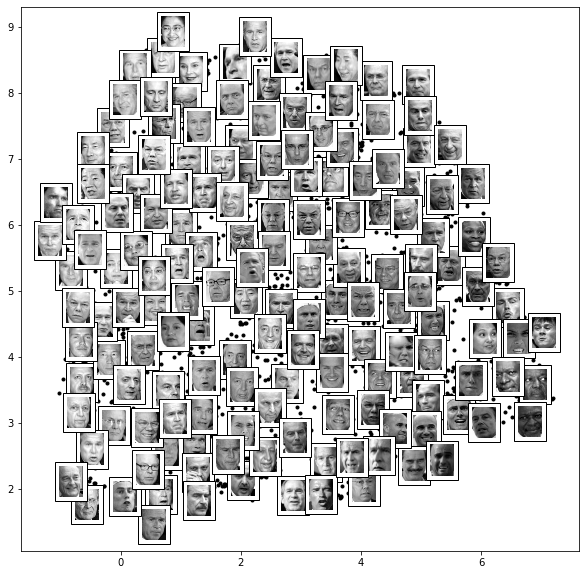

In [32]:
# plotting from manifold learning lec

from sklearn.manifold import Isomap

from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    print(proj.shape)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

data = faces.data

fig, ax = plt.subplots(figsize=(10, 10))
model = umap.UMAP(n_neighbors=5, n_components=2)
plot_components(data, model, images=faces.images[:, ::2, ::2])